In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 100
fraction_of_outliers = 0.1
number_inliers = int((1-fraction_of_outliers) * n_samples)
number_outliers = n_samples - number_inliers

In [3]:
#We will create 100 data points, and 10 percent of them will be outliers:
#Get some samples from a normal distribution
normal_data = np.random.randn(number_inliers, 1)

We will use the randn function in the random module of NumPy to generate our inliers.
This will be a sample from a distribution with a mean of zero and a standard deviation of
one. Let’s verify the mean and standard deviation of our sample:

In [4]:
# Print the mean and standard deviation
# to confirm the normality of our input data.
mean = np.mean(normal_data, axis=0)
std = np.std(normal_data, axis=0)
print("Mean = (%0.2f) and Standard Deviation (%0.2f)"%(mean[0], std[0]))

Mean = (-0.14) and Standard Deviation (1.03)


In [6]:
#Create outlier data
outlier_data = np.random.uniform(low=-9, high=9, size=(number_outliers,1))
total_data = np.r_[normal_data, outlier_data]
print("Size of input data = (%d,%d)"%(total_data.shape))

Size of input data = (100,1)


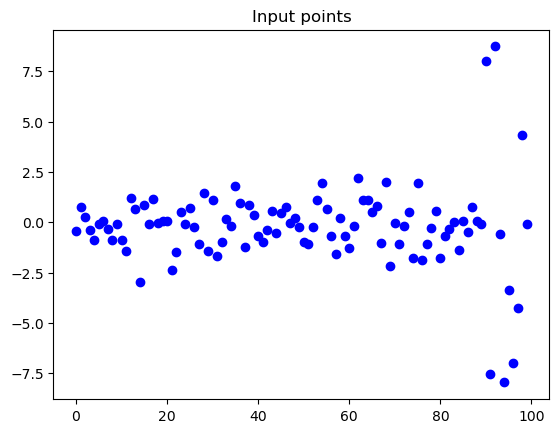

In [11]:
#Eyeball the data
plt.cla()
plt.figure(1)
plt.title("Input points")
plt.scatter(range(len(total_data)), total_data, c='b')

In [12]:
# Median Absolute Deviation
median = np.median(total_data)
b = 1.4826
mad = b * np.median(np.abs(total_data - median))
outliers = []

#useful while plotting
outlier_index = []
print("Median absolute Deviation = %.2f"%(mad))
lower_limit = median - (3*mad)
upper_limit = median + (3*mad)
print("Lower limit = %0.2f, Upper limit = %0.2f"%(lower_limit, upper_limit))
for i in range(len(total_data)):
    if total_data[i] > upper_limit or total_data[i] < lower_limit:
        print("Outlier %0.2f"%(total_data[i]))
        outliers.append(total_data[i])
        outlier_index.append(i)

Median absolute Deviation = 1.17
Lower limit = -3.62, Upper limit = 3.42
Outlier 8.03
Outlier -7.52
Outlier 8.73
Outlier -7.96
Outlier -6.97
Outlier -4.26
Outlier 4.32


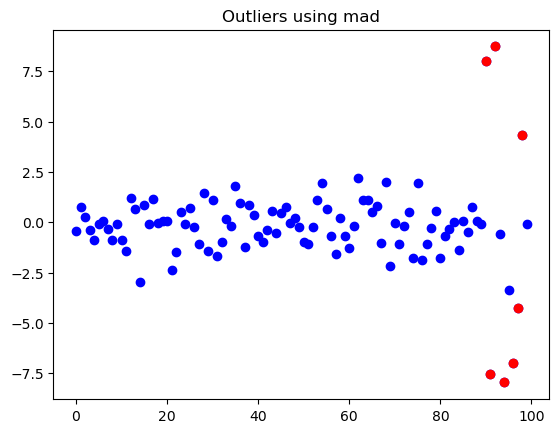

In [13]:
plt.figure(2)
plt.title("Outliers using mad")
plt.scatter(range(len(total_data)), total_data, c='b')
plt.scatter(outlier_index, outliers, c='r')
plt.show()

In [15]:
#Moving on to the mean plus or minus three standard deviation, we will plot our
#values, with the outliers colored in red:
#Standard deviation
std = np.std(total_data)
mean = np.mean(total_data)
b = 3
outliers = []
outlier_index = []
lower_limit = mean-b*std
upper_limit = mean+b*std
print("Lower limit = %0.2f, Upper limit = %0.2f"%(lower_limit, upper_limit))
for i in range(len(total_data)):
    x = total_data[i]
    if x > upper_limit or x < lower_limit:
        print("Outlier %0.2f"%(total_data[i]))
        outliers.append(total_data[i])
        outlier_index.append(i)

Lower limit = -6.58, Upper limit = 6.14
Outlier 8.03
Outlier -7.52
Outlier 8.73
Outlier -7.96
Outlier -6.97


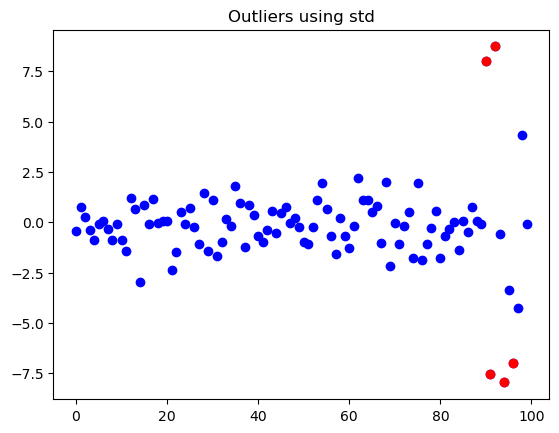

In [17]:
plt.figure(3)
plt.title("Outliers using std")
plt.scatter(range(len(total_data)), total_data, c='b')
plt.scatter(outlier_index, outliers, c='r')
plt.savefig("outlier.png")
plt.show()